<a href="https://colab.research.google.com/github/seiya-kuriyama/portfolio-projects/blob/main/%EF%BC%8CHCM%E6%B3%95%E3%81%AB%E5%9F%BA%E3%81%A5%E3%81%8FCF%E3%80%80%E6%8F%90%E5%87%BA%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()
files.upload()

Saving needs_scan_panel_training[1].csv to needs_scan_panel_training[1].csv


Saving needs_scan_panel_test[1].csv to needs_scan_panel_test[1] (1).csv


{'needs_scan_panel_test[1] (1).csv': b'1,1,0\r\n2,4,0\r\n2,8,0\r\n3,1,1\r\n3,11,0\r\n4,15,1\r\n6,8,0\r\n7,8,1\r\n7,10,1\r\n9,1,0\r\n9,5,0\r\n9,8,0\r\n9,16,0\r\n10,11,0\r\n11,9,1\r\n13,1,1\r\n14,15,1\r\n15,5,0\r\n16,0,1\r\n18,17,0\r\n20,13,1\r\n21,1,1\r\n24,1,0\r\n24,7,1\r\n24,8,0\r\n26,6,1\r\n27,2,1\r\n29,4,0\r\n30,3,1\r\n30,6,0\r\n30,7,0\r\n30,13,1\r\n32,1,1\r\n32,12,1\r\n36,17,0\r\n37,5,0\r\n38,1,1\r\n38,11,0\r\n39,5,1\r\n39,10,1\r\n40,8,1\r\n40,16,0\r\n41,15,1\r\n41,17,1\r\n42,0,1\r\n42,7,1\r\n42,15,1\r\n43,1,1\r\n43,11,0\r\n45,4,1\r\n45,8,1\r\n46,4,0\r\n47,4,1\r\n47,14,1\r\n49,8,1\r\n49,12,1\r\n52,4,1\r\n53,4,1\r\n54,10,1\r\n54,12,1\r\n55,13,0\r\n55,14,1\r\n57,17,0\r\n58,10,1\r\n59,1,0\r\n59,7,0\r\n59,15,1\r\n61,9,1\r\n62,4,1\r\n63,6,1\r\n63,12,1\r\n63,14,1\r\n65,10,1\r\n66,12,1\r\n66,14,1\r\n66,17,0\r\n69,9,1\r\n71,8,1\r\n75,5,0\r\n75,14,0\r\n76,11,0\r\n78,9,1\r\n78,11,1\r\n79,15,1\r\n82,7,1\r\n82,11,0\r\n82,13,0\r\n83,11,0\r\n86,1,1\r\n87,2,1\r\n87,5,1\r\n87,17,0\r\n88,15,1\r\n90

In [ ]:
import pandas as pd
data_training = pd.read_csv('needs_scan_panel_training[1].csv', header=None)
data_test = pd.read_csv('needs_scan_panel_test[1].csv', header=None)
r = data_training.values
t = data_test.values
print(r)
print(t)

[[1 0 1 ... 1 1 0]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]]
[[  1   1   0]
 [  2   4   0]
 [  2   8   0]
 ...
 [993   1   0]
 [993   2   1]
 [995   8   0]]


In [ ]:
def hcm(X, C):
  n, m = X.shape
  b = X[np.random.choice(n, C, replace=False)]
  u_old = np.zeros((C, n))
  for step in range (100):
    d = dist.cdist(b, X)
    u = np.zeros((C, n))
    u[d.argmin(0), range(n)] = 1
    if np.abs(u-u_old).max() < 1e-5:
      break
    u_old = u.copy()
    b = u@X/u.sum(1)[:, np.newaxis]
  return u,b
C = 2
u, b = hcm (r, C)


In [ ]:
u

array([[1., 1., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
b

array([[0.80804388, 0.40036563, 0.91224863, 0.91590494, 1.        ,
        0.51919561, 0.85740402, 0.33272395, 0.29067642, 0.86471664,
        0.83912249, 0.17184644, 0.91042048, 0.35100548, 0.63071298,
        0.94332724, 0.24862888, 0.27422303],
       [0.75946548, 0.21380846, 0.85523385, 0.81959911, 0.        ,
        0.44320713, 0.72383073, 0.26503341, 0.25612472, 0.82405345,
        0.77282851, 0.21826281, 0.92650334, 0.30512249, 0.53006682,
        0.94432071, 0.18262806, 0.18485523]])

In [ ]:
r

array([[1, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [ ]:
t

array([[  1,   1,   0],
       [  2,   4,   0],
       [  2,   8,   0],
       ...,
       [993,   1,   0],
       [993,   2,   1],
       [995,   8,   0]])

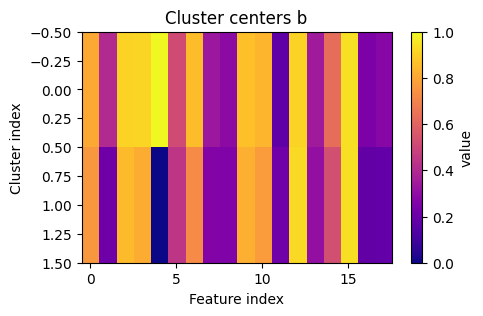

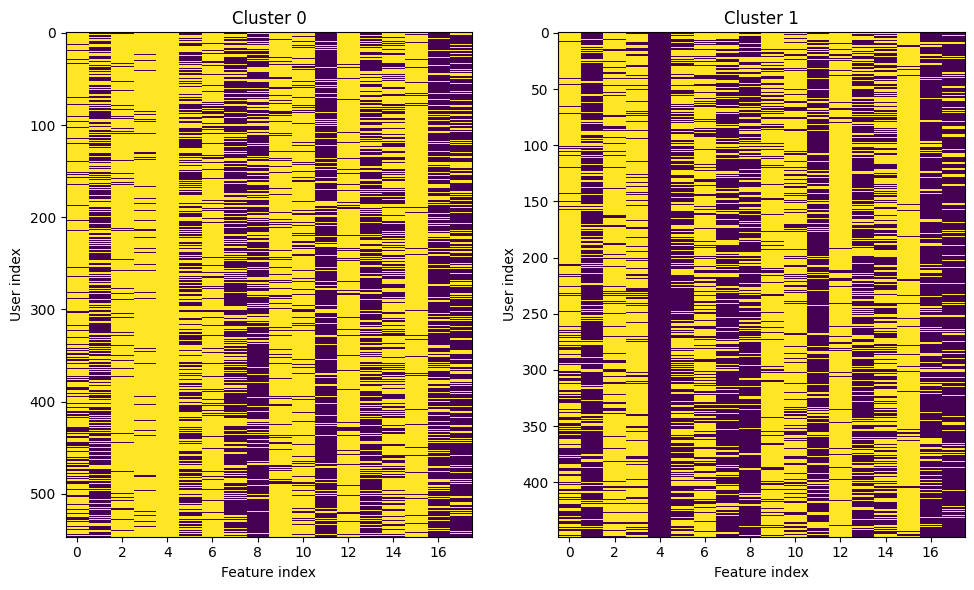

In [ ]:
import matplotlib.pyplot as plt
import numpy as np #念のためnumpyも
# ==== b の可視化 ====
plt.figure(figsize=(5, 3))
plt.title("Cluster centers b")
plt.imshow(b, aspect='auto', cmap='plasma')
plt.colorbar(label="value")
plt.xlabel("Feature index")
plt.ylabel("Cluster index")
plt.show()

# ==== 各クラスタのユーザーデータをimshowで表示 ====
plt.figure(figsize=(10, 6))
for c in range(C):
     plt.subplot(1, C, c + 1)
     plt.title(f"Cluster {c}")
     members = r[u[c] == 1]  # クラスタ c に属するユーザーのデータだけ取り出す
     if len(members) > 0:
         plt.imshow(members, aspect='auto', cmap='viridis',  interpolation='nearest')
         plt.xlabel("Feature index")
         plt.ylabel("User index")
     else:
         plt.text(0.5, 0.5, "No members", ha='center', va='center')
plt.tight_layout()
plt.show()

In [ ]:
# 文章にある通りの計算式
# 「メンバシップ行列(u)の転置(.T)」と「クラスター中心行列(b)」の「行列積(@)」
X_rec = u.T @ b

# 結果の形を確認（ユーザー数 x 商品数 になっているはずです）
print("推薦度行列の形:", X_rec.shape)
print("中身の確認（最初の1ユーザー分）:\n", X_rec[0])

推薦度行列の形: (996, 18)
中身の確認（最初の1ユーザー分）:
 [0.80804388 0.40036563 0.91224863 0.91590494 1.         0.51919561
 0.85740402 0.33272395 0.29067642 0.86471664 0.83912249 0.17184644
 0.91042048 0.35100548 0.63071298 0.94332724 0.24862888 0.27422303]


In [ ]:
# 1. まず、スコアの範囲（最小値と最大値）を確認します
min_val = X_rec.min()
max_val = X_rec.max()
print(f"予測スコアの範囲: {min_val:.4f} 〜 {max_val:.4f}")

# 2. 閾値(eta)を決めます
# ※ここでは例として、範囲のちょうど「平均値」を閾値にします。
# （必要に応じて数値を書き換えて調整してください）
eta = X_rec.mean()
print(f"今回の閾値(eta): {eta:.4f}")

# 3. 判定を行い、True/False を 1/0 に変換します
# 「予測値(X_rec) が 閾値(eta) 以上なら 1、そうでなければ 0」
X_bar = (X_rec >= eta).astype(int)

# 結果の確認（最初のユーザーの推薦状況）
print("\n推薦有無行列 X_bar (最初のユーザー):\n", X_bar[0])

予測スコアの範囲: 0.0000 〜 1.0000
今回の閾値(eta): 0.5749

推薦有無行列 X_bar (最初のユーザー):
 [1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0]


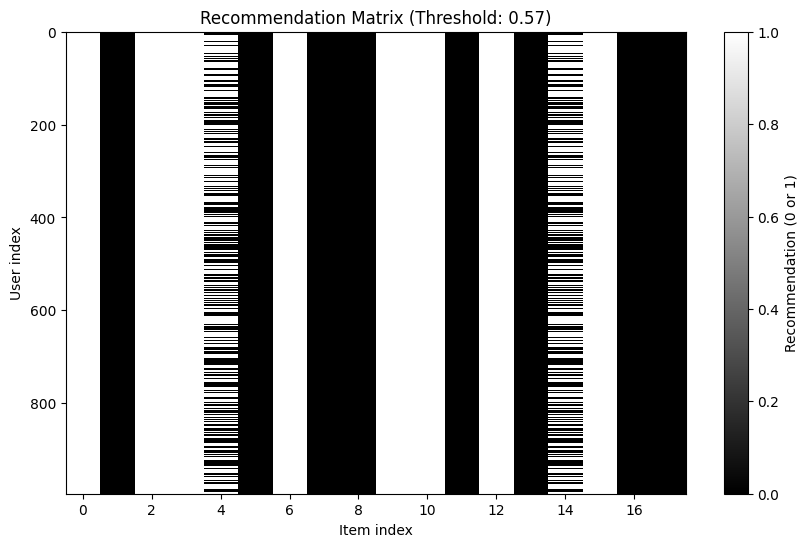

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(f"Recommendation Matrix (Threshold: {eta:.2f})")
plt.imshow(X_bar, aspect='auto', cmap='gray', interpolation='nearest')
plt.xlabel("Item index")
plt.ylabel("User index")
plt.colorbar(label="Recommendation (0 or 1)")
plt.show()

In [ ]:
X_rec

array([[0.80804388, 0.40036563, 0.91224863, ..., 0.94332724, 0.24862888,
        0.27422303],
       [0.80804388, 0.40036563, 0.91224863, ..., 0.94332724, 0.24862888,
        0.27422303],
       [0.75946548, 0.21380846, 0.85523385, ..., 0.94432071, 0.18262806,
        0.18485523],
       ...,
       [0.75946548, 0.21380846, 0.85523385, ..., 0.94432071, 0.18262806,
        0.18485523],
       [0.80804388, 0.40036563, 0.91224863, ..., 0.94332724, 0.24862888,
        0.27422303],
       [0.80804388, 0.40036563, 0.91224863, ..., 0.94332724, 0.24862888,
        0.27422303]])

In [ ]:
X_bar

array([[1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]])

Training data shape: (996, 18)
Test data shape: (1000, 3)
計算を開始します...
Cluster C=2: AUC = 0.8161
Cluster C=3: AUC = 0.8148
Cluster C=4: AUC = 0.8194
Cluster C=5: AUC = 0.8092
Cluster C=6: AUC = 0.8080
Cluster C=7: AUC = 0.8139
Cluster C=8: AUC = 0.7863
Cluster C=9: AUC = 0.7707
Cluster C=10: AUC = 0.8242
Cluster C=11: AUC = 0.7379
Cluster C=12: AUC = 0.7567
Cluster C=13: AUC = 0.7633
Cluster C=14: AUC = 0.8095
Cluster C=15: AUC = 0.7411


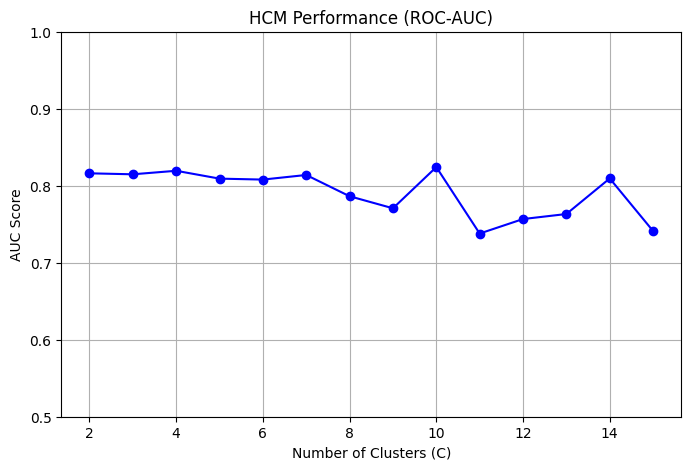

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import scipy.spatial.distance as dist

# 1. データの読み込み
# トレーニングデータ（行列形式）
data_training = pd.read_csv('needs_scan_panel_training[1].csv', header=None)
r = data_training.values  # トレーニングデータ

# テストデータ（リスト形式: UserID, ItemID, Label）
data_test = pd.read_csv('needs_scan_panel_test[1].csv', header=None)
test_values = data_test.values

# テストデータを分解（ユーザーID, 商品ID, 正解ラベル）
# ※Pythonのインデックスに合わせて調整が必要な場合がありますが、
#   データを見る限りそのまま使える形式(0始まり等)と仮定して進めます
test_users = test_values[:, 0]   # ユーザーID列
test_items = test_values[:, 1]   # 商品ID列
test_labels = test_values[:, 2]  # 正解ラベル列 (0 or 1)

print(f"Training data shape: {r.shape}")
print(f"Test data shape: {test_values.shape}")

# 2. HCM関数の定義
def hcm(X, C):
    n, m = X.shape
    # ランダムに中心点を選ぶ
    # (エラー防止のためシードを固定しても良いですが、今回はランダムのままにします)
    b = X[np.random.choice(n, C, replace=False)]
    u_old = np.zeros((C, n))

    for step in range(100):
        # 距離計算
        d = dist.cdist(b, X)

        # 所属決定 (Hard Assignment)
        u = np.zeros((C, n))
        u[d.argmin(0), range(n)] = 1

        # 収束判定
        if np.abs(u - u_old).max() < 1e-5:
            break
        u_old = u.copy()

        # 中心点の更新 (0除算回避のため少し小さな値を分母に足す工夫もアリですが、標準的な式で書きます)
        # 所属するデータがないクラスタができるとエラーになる可能性があるため、安全策を追加
        cluster_counts = u.sum(1)[:, np.newaxis]
        # countが0の場合は更新しない（あるいはランダム再配置）などの処理が必要ですが
        # 今回は簡易的に 1e-10 を足して0除算を防ぎます
        b = (u @ X) / (cluster_counts + 1e-10)

    return u, b

# 3. クラスター数を変えながら評価 (ROC-AUC)
C_list = range(2, 16)
auc_scores = []

print("計算を開始します...")

for C in C_list:
    # --- HCMの実行 ---
    u, b = hcm(r, C)

    # --- 推薦スコア(X_rec)の全計算 ---
    # ここで (全ユーザー x 全商品) のスコア行列ができます
    X_rec = u.T @ b

    # --- 【重要】テストデータの場所だけ予測値を抜き出す ---
    # 行列 X_rec から、テストデータにある (ユーザー, 商品) のペアのスコアだけを取得
    pred_scores = X_rec[test_users, test_items]

    # --- AUCの計算 ---
    # 抜き出したスコア(pred_scores) と テストデータの正解(test_labels) を比較
    score = roc_auc_score(test_labels, pred_scores)

    auc_scores.append(score)
    print(f"Cluster C={C}: AUC = {score:.4f}")

# 4. 結果のグラフ化
plt.figure(figsize=(8, 5))
plt.plot(C_list, auc_scores, marker='o', linestyle='-', color='b')
plt.title("HCM Performance (ROC-AUC)")
plt.xlabel("Number of Clusters (C)")
plt.ylabel("AUC Score")
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()